In [1]:
import torch
from torch import nn 
import numpy as np
import matplotlib.pyplot as plt

from utils import ray_generator, plot_rays
from model import Sphere
from rendering import rendering
from loss import mse_loss, mse2psnr

In [7]:
#constants
HEIGHT = 400
WIDTH = 400
FOCUS = 1200

tn = 0.8
tf = 1.2

ORIGIN = [0., 0., -1.]
RADIUS = [.1]
learning_rate = 2e-1

color = [0., 1., 1.] #cyan
target_color = [1., 0., 1.] #purple

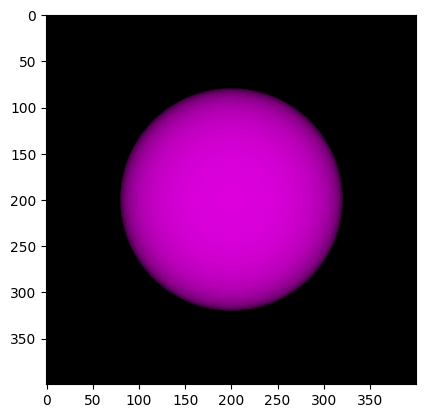

In [3]:
rays_origin , rays_direction = ray_generator(HEIGHT, WIDTH, FOCUS)

target_sphere = Sphere(torch.tensor(ORIGIN), torch.tensor(RADIUS), torch.tensor(target_color))
target_px_colors = rendering(target_sphere, torch.tensor(rays_origin), torch.tensor(rays_direction), 0.8, 1.2, white_background=False)

target_img = target_px_colors.reshape(HEIGHT, WIDTH, 3).cpu().numpy()
plt.imshow(target_img)

In [10]:
color_to_optimize = torch.tensor(color, requires_grad = True, dtype = torch.float32)
optimizer = torch.optim.SGD(params={color_to_optimize}, lr=learning_rate)

loss: 0.0017
color: tensor([0.8718, 0.1282, 1.0000])


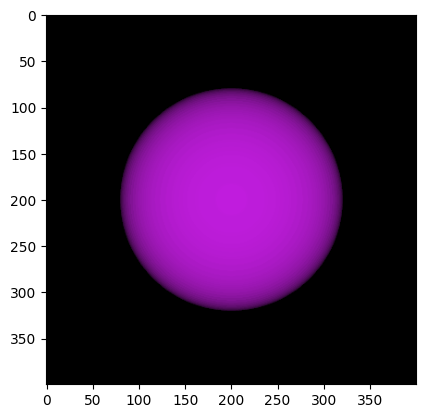

KeyboardInterrupt: 

In [35]:
for epoch in range(200):
    #using helper functions without print statements
    s = Sphere(torch.tensor(ORIGIN), torch.tensor(RADIUS), color_to_optimize)
    Ax = rendering(s, torch.tensor(rays_origin),torch.tensor(rays_direction), 0.8, 1.2, white_background=False)


    loss = ((Ax - target_px_colors)**2).mean()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 20 == 0:
        print(f"loss: {loss:.4f}")
        print(f"color: {color_to_optimize.data}")
        
        img = Ax.reshape(HEIGHT, WIDTH, 3).cpu().data.numpy()
        plt.imshow(img)
        plt.show()